In [1]:
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [2]:
train_path = '/Users/waranthornchansawang/Desktop/Split/train/'
val_path = '/Users/waranthornchansawang/Desktop/Split/val/'
test_path = '/Users/waranthornchansawang/Desktop/Split/test/'

In [3]:
image_size = 224
batch_size = 32
epochs = 5

In [4]:
train_generator = ImageDataGenerator(
    preprocessing_function= \
    keras.applications.densenet.preprocess_input).flow_from_directory(
    train_path,
    target_size=(image_size, image_size),
    batch_size=batch_size)

val_generator = ImageDataGenerator(
    preprocessing_function= \
    keras.applications.densenet.preprocess_input).flow_from_directory(
    val_path,
    target_size=(image_size, image_size),
    batch_size=batch_size)

test_generator = ImageDataGenerator(
    preprocessing_function= \
    keras.applications.densenet.preprocess_input).flow_from_directory(
    test_path,
    target_size=(image_size, image_size),
    batch_size=batch_size)

Found 8010 images belonging to 8 classes.
Found 998 images belonging to 8 classes.
Found 1007 images belonging to 8 classes.


In [5]:
nb_train = len(train_generator.filenames)
nb_val = len(val_generator.filenames)
nb_test = len(test_generator.filenames)
print(nb_train)
print(nb_val)
print(nb_test)

8010
998
1007


In [6]:
train_steps = np.ceil(nb_train/batch_size)
val_steps = np.ceil(nb_val/batch_size)

In [7]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(image_size, image_size, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))

W1007 17:46:05.477376 4587320768 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1007 17:46:05.491479 4587320768 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1007 17:46:05.494268 4587320768 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1007 17:46:05.506099 4587320768 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:42

In [8]:
#model.summary()

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

W1007 17:46:05.559231 4587320768 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1007 17:46:05.577193 4587320768 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=train_steps,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_steps)

W1007 17:46:05.656733 4587320768 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
251/251 [==============================] - 180s 715ms/step - loss: 5.3643 - acc: 0.6644 - val_loss: 5.2973 - val_acc: 0.6713
Epoch 2/5
251/251 [==============================] - 195s 776ms/step - loss: 5.3283 - acc: 0.6693 - val_loss: 5.2973 - val_acc: 0.6713
Epoch 3/5
251/251 [==============================] - 178s 709ms/step - loss: 5.3537 - acc: 0.6677 - val_loss: 5.2973 - val_acc: 0.6713
Epoch 4/5
251/251 [==============================] - 168s 669ms/step - loss: 5.3414 - acc: 0.6682 - val_loss: 5.2973 - val_acc: 0.6713
Epoch 5/5
251/251 [==============================] - 168s 669ms/step - loss: 5.3307 - acc: 0.6693 - val_loss: 5.2973 - val_acc: 0.6713


In [11]:
Y_pred = model.predict_generator(val_generator, nb_test//batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('')
print('Classification Report')
classes_names = ['1', '2', '3', '4', '5', '6', '7']
print(classification_report(val_generator.classes, y_pred, target_names=classes_names))

Confusion Matrix
[[  0   0   0   0   0  32   0]
 [  0   0   0   0   0  51   0]
 [  0   0   0   0   0 109   0]
 [  0   0   0   0   0  11   0]
 [  0   0   0   0   0 111   0]
 [  0   0   0   0   0 670   0]
 [  0   0   0   0   0  14   0]]

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00       109
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00       111
           6       0.67      1.00      0.80       670
           7       0.00      0.00      0.00        14

    accuracy                           0.67       998
   macro avg       0.10      0.14      0.11       998
weighted avg       0.45      0.67      0.54       998



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
print(Y_pred)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [13]:
test_labels = test_generator.classes

32/32 [==============================] - 12s 379ms/step
Confusion matrix, without normalization
[[  0   0   0   0   0  34   0]
 [  0   0   0   0   0  52   0]
 [  0   0   0   0   0 111   0]
 [  0   0   0   0   0  12   0]
 [  0   0   0   0   0 112   0]
 [  0   0   0   0   0 671   0]
 [  0   0   0   0   0  15   0]]


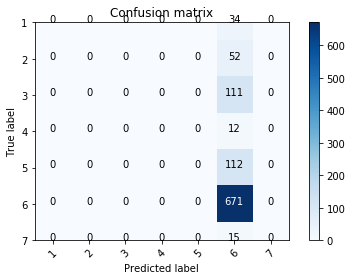

In [14]:
predictions = model.predict_generator(test_generator, steps=val_steps, verbose=1)

# Declare a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

cm_plot_labels = ['1', '2', '3', '4', '5', '6', '7']

plot_confusion_matrix(cm, cm_plot_labels)

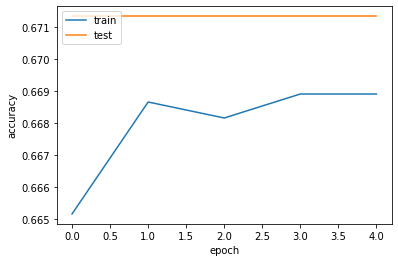

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

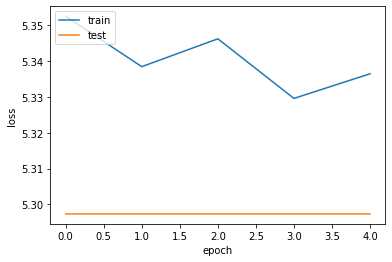

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()